## LAB № 05

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.  

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
target = 1
name = 'auto-mpg.data'

In [3]:
df = pd.read_csv("../data/auto-mpg.data",
                 delimiter="  ", header=None, on_bad_lines='skip')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,18.0,8,307.0,NaN,NaN,130.0,NaN,NaN,3504.0,NaN,NaN,12.0,70,"1\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,NaN,NaN,165.0,NaN,NaN,3693.0,NaN,NaN,11.5,70,"1\t""buick skylark 320"""
2,18.0,8,318.0,NaN,NaN,150.0,NaN,NaN,3436.0,NaN,NaN,11.0,70,"1\t""plymouth satellite"""
3,16.0,8,304.0,NaN,NaN,150.0,NaN,NaN,3433.0,NaN,NaN,12.0,70,"1\t""amc rebel sst"""
4,17.0,8,302.0,NaN,NaN,140.0,NaN,NaN,3449.0,NaN,NaN,10.5,70,"1\t""ford torino"""


In [4]:
df.shape

(391, 14)

2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если столбец с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации с примерно равным количеством точек в положительном и отрицательном классах. Если один из классов является преобладающим (мажоритарным), то объедините все прочие классы в другой класс. 

In [5]:
df = df.replace('?', np.NaN)
print('Число записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))
print('Число пропущенных значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Число записей = 391
Число признаков = 14
Число пропущенных значений:
	0: 0
	1: 0
	2: 0
	3: 391
	4: 391
	5: 0
	6: 391
	7: 391
	8: 0
	9: 391
	10: 391
	11: 0
	12: 0
	13: 0


In [6]:
df.dropna(subset=[target], inplace=True)
lb_make = LabelEncoder()
df[target] = lb_make.fit_transform(df[target])
df[target].value_counts()

1    199
4    102
3     83
0      4
2      3
Name: 1, dtype: int64

In [7]:
value_counts = df[target].value_counts()

while len(value_counts) > 2:
    smallest_class = value_counts.idxmin()
    second_smallest_class = value_counts.nsmallest(2).index[1]
    df[target] = df[target].replace(smallest_class, second_smallest_class)
    value_counts = df[target].value_counts()

df[target] = lb_make.fit_transform(df[target])
df[target].value_counts()

0    199
1    192
Name: 1, dtype: int64

3. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Удалите из набора признаки с текстовыми (категориальными) значениями. Если в оставшихся числовых признаках имеются пропущенные значения, то замените их на средние значения для положительного и отрицательного классов.  


In [8]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,18.0,1,307.0,NaN,NaN,130.0,NaN,NaN,3504.0,NaN,NaN,12.0,70,"1\t""chevrolet chevelle malibu"""
1,15.0,1,350.0,NaN,NaN,165.0,NaN,NaN,3693.0,NaN,NaN,11.5,70,"1\t""buick skylark 320"""
2,18.0,1,318.0,NaN,NaN,150.0,NaN,NaN,3436.0,NaN,NaN,11.0,70,"1\t""plymouth satellite"""


In [9]:
df = df.select_dtypes(exclude=['object'])
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,18.0,1,307.0,NaN,NaN,130.0,NaN,NaN,3504.0,NaN,NaN,12.0,70
1,15.0,1,350.0,NaN,NaN,165.0,NaN,NaN,3693.0,NaN,NaN,11.5,70
2,18.0,1,318.0,NaN,NaN,150.0,NaN,NaN,3436.0,NaN,NaN,11.0,70


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       391 non-null    float64
 1   1       391 non-null    int64  
 2   2       391 non-null    float64
 3   3       0 non-null      float64
 4   4       0 non-null      float64
 5   5       391 non-null    float64
 6   6       0 non-null      float64
 7   7       0 non-null      float64
 8   8       391 non-null    float64
 9   9       0 non-null      float64
 10  10      0 non-null      float64
 11  11      391 non-null    float64
 12  12      391 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 39.8 KB


In [11]:
df = df.dropna(axis=1, how='all')
df.fillna(df.groupby(target).transform('mean'), inplace=True)
df.isna().sum()

0     0
1     0
2     0
5     0
8     0
11    0
12    0
dtype: int64

4. Выполните стандартизацию признаков набора данных.  


In [12]:
X = df.drop([target],axis=1)
y = df[target]

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = pd.DataFrame(scaler.fit_transform(X))

5. Используя метод отбора признаков, указанный в индивидуальном задании, определите и оставьте в наборе данных два наиболее значимых признака, принимающих более 10 различных значений.


In [14]:
X = X[X.columns[X.nunique() > 10]].values
X[:3,:]

array([[-0.70558601,  1.08011272,  0.67375259,  0.62847772, -1.28276762,
        -1.63291787],
       [-1.09165392,  1.49160871,  1.58928275,  0.85221412, -1.46426945,
        -1.63291787],
       [-0.70558601,  1.18537914,  1.19691268,  0.54797996, -1.64577127,
        -1.63291787]])

In [15]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X, y);
print("Число признаков: %d" % fit.n_features_)
print("Выбранные признаки: %s" % fit.support_)
print("Ранг признаков: %s" % fit.ranking_)

selected_features = []
for feature, support in zip(pd.DataFrame(X).columns, fit.support_):
    if support: 
        selected_features.append(feature)

print("Выбранные признаки: %s" % selected_features[:2])
X_2 = pd.DataFrame(X)[selected_features[:2]].values

Число признаков: 3
Выбранные признаки: [ True  True False  True False False]
Ранг признаков: [1 1 3 1 2 4]
Выбранные признаки: [0, 1]


6. Визуализируйте набор данных в виде точек на плоскости, отображая точки положительного и отрицательного классов разными цветами и разными маркерами. В качестве подписей осей используйте названия признаков, согласно описания набора данных. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.


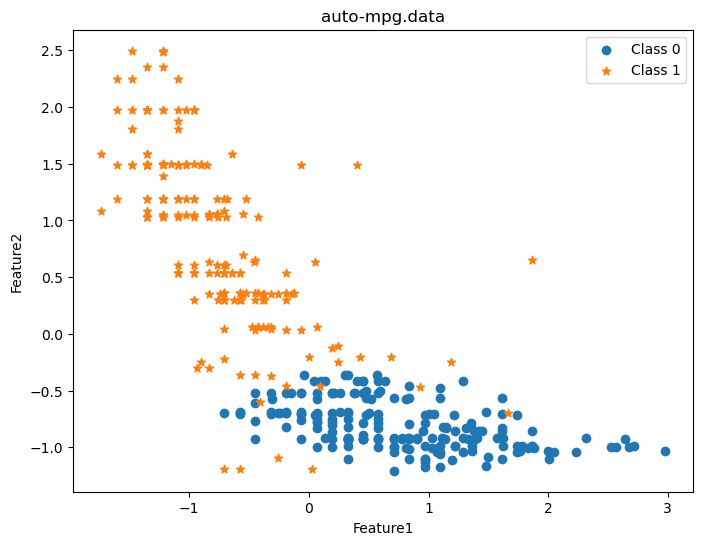

In [16]:
plt.figure(figsize=(8, 6))
cmap = plt.cm.get_cmap('viridis', len(np.unique(y)))
for class_label in np.unique(y):
    if class_label==0:
        plt.scatter(X_2[y == class_label, 0], X_2[y == class_label, 1], cmap=cmap, marker='o', label=f'Class {class_label}')
    else:
        plt.scatter(X_2[y == class_label, 0], X_2[y == class_label, 1], cmap=cmap, marker='*', label=f'Class {class_label}')
plt.title(name)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

7. Создайте модели классификации точек набора данных из двух признаков на базе классификаторов, указанных в индивидуальном задании. Используйте при обучении классификаторов разделение набора данных на обучающую и тестовую выборки в соотношении 70% на 30%. 


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=666)

In [18]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

clf1 = GaussianNB()
clf1.fit(X_train, y_train)

clf2 = LinearSVC(C=1e9)
clf2.fit(X_train, y_train);

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("linearSVC", LinearSVC(C=C))
    ])
clf3 = PolynomialSVC(degree=2, C=100.)
clf3.fit(X_train, y_train);

8. Визуализируйте для каждого из классификаторов границу принятия решения, подписывая оси и рисунок и создавая легенду для меток классов набора данных в соответствии с требованиями п. 6.  


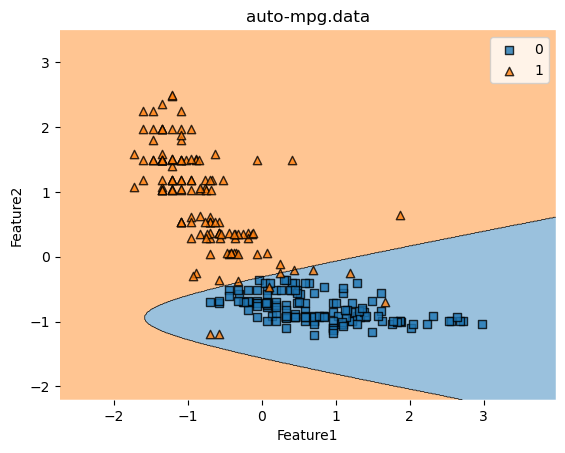

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.astype(int).values, clf=clf1)
plt.title(name)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

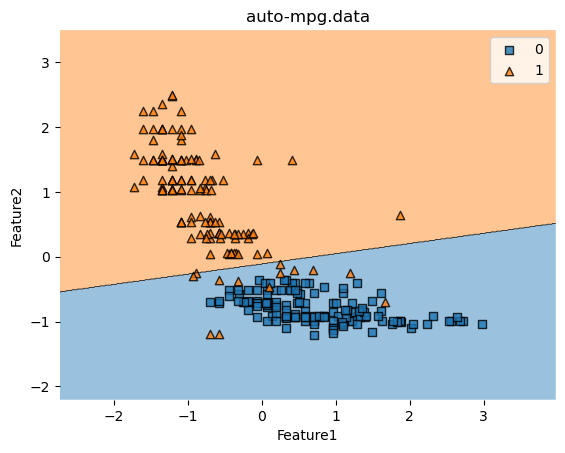

In [20]:
plot_decision_regions(X_train, y_train.astype(int).values, clf=clf2)
plt.title(name)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

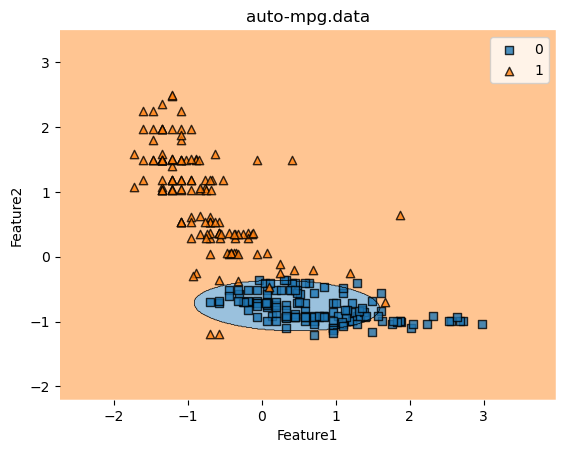

In [21]:
plot_decision_regions(X_train, y_train.astype(int).values, clf=clf3)
plt.title(name)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

9. Визуализируйте на одном рисунке кривые бинарной классификации, указанные в индивидуальном задании, для каждого из классификаторов, подписывая оси и рисунок. Используйте в качестве меток легенды для названия классификаторов.  

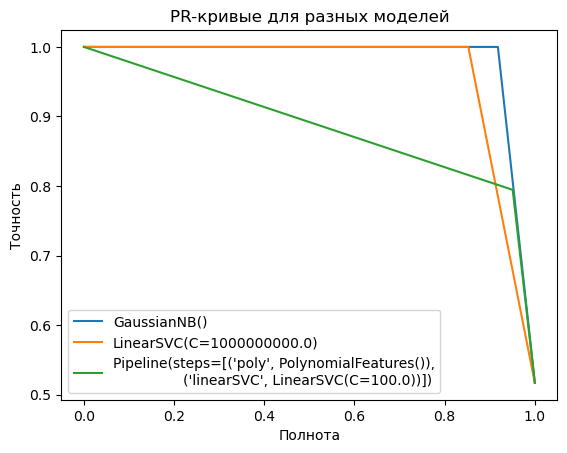

In [22]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

probs1 = clf1.predict(X_test)
probs2 = clf2.predict(X_test)
probs3 = clf3.predict(X_test)

precision1, recall1, _ = precision_recall_curve(y_test, probs1)
precision2, recall2, _ = precision_recall_curve(y_test, probs2)
precision3, recall3, _ = precision_recall_curve(y_test, probs3)

plt.plot(recall1, precision1, label=clf1)
plt.plot(recall2, precision2, label=clf2)
plt.plot(recall3, precision3, label=clf3)
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.legend()
plt.title('PR-кривые для разных моделей')
plt.show()

10. Определите лучший из используемых методов бинарной классификации по показателю площади, ограниченной кривой из п. 9.  

In [23]:
from sklearn.metrics import auc

area_under_curve1 = auc(recall1, precision1)
area_under_curve2 = auc(recall2, precision2)
area_under_curve3 = auc(recall3, precision3)

best_model = None
best_auc = 0.0

if area_under_curve1 > best_auc:
    best_auc = area_under_curve1
    best_model = clf1

if area_under_curve2 > best_auc:
    best_auc = area_under_curve2
    best_model = clf2

if area_under_curve3 > best_auc:
    best_auc = area_under_curve3
    best_model = clf3

print(f"Лучшая модель по площади под PR-кривой: {best_model} (AUC = {best_auc})")

Лучшая модель по площади под PR-кривой: GaussianNB() (AUC = 0.9802028341205891)
